-----------------------------
## Linear Regression
-----------------------------
## Backdrop
-----------------------------
To construct a linear regression model

-----------------------------
## Objective
-----------------------------
To explain the relationship between a car's mileage with its other attributes

**Import the necessary libraries**

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
my_data = pd.read_csv("auto-mpg.csv")  
my_data.shape

(398, 9)

In [3]:
my_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#drop car_name 
my_data = my_data.drop('car name', axis=1)

#replacing the categorical var with actual values
my_data['origin'] = my_data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
my_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


**Create dummy variables**

Create true or false columns to ask, "is this Asia?", "is this America?" to be used as dummy variables

In [5]:
my_data = pd.get_dummies(my_data, columns=['origin'])
my_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [6]:
#Describe the data
my_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [7]:
# hp is missing cause it does not seem to be recognized as a numerical column
my_data.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [8]:
# Is the hp column numerical or missing?
hpIsDigit = pd.DataFrame(my_data.horsepower.str.isdigit()) 
my_data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [9]:
# Replace missing values with NaN, the missing values have a question mark
my_data = my_data.replace('?', np.nan)
my_data[hpIsDigit['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [10]:
#replace the missing values with median value. 
my_data.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [11]:
#Fill in the missing values with the median value, every column missing value will be replaced (axis =0 means columnwise)

medianFiller = lambda x: x.fillna(x.median())
my_data = my_data.apply(medianFiller,axis=0)

my_data['horsepower'] = my_data['horsepower'].astype('float64')  # converting the hp column from object / string type to float
my_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


**Lets do a bivariate analysis**

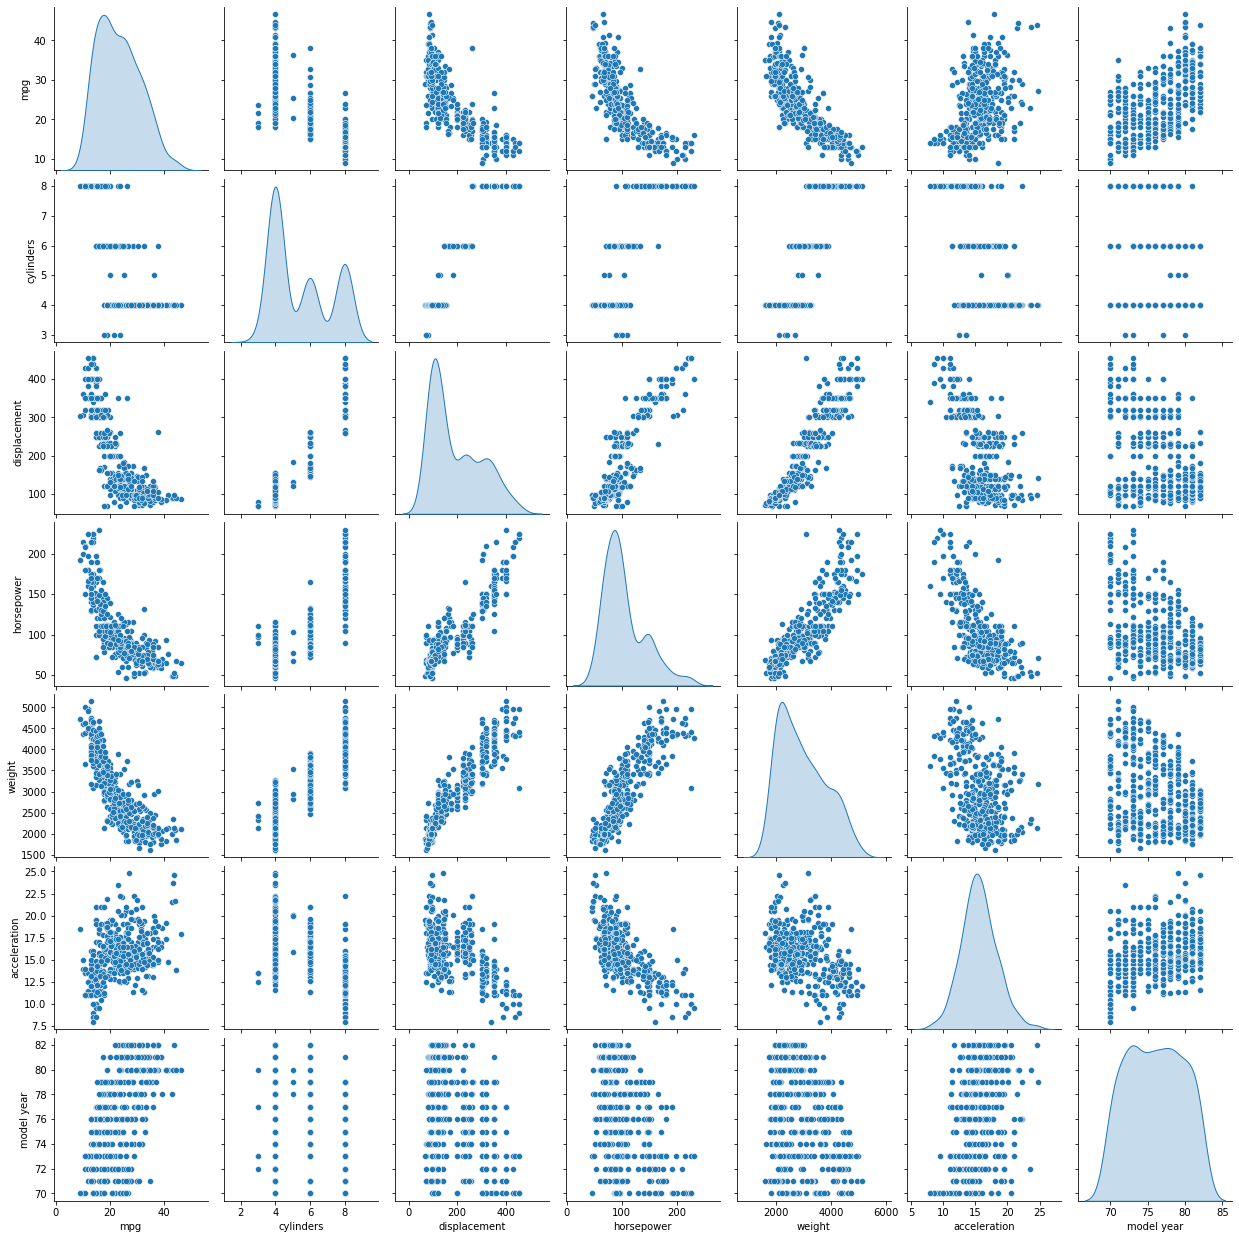

In [12]:
#Bivariate plots Bivariate analysis is a kind of statistical analysis when two variables are observed against each other. 
#One of the variables will be dependent and the other is independent.

data_attr = my_data.iloc[:, 0:7]
sns.pairplot(data_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

**Observations** 

- Between 'mpg' and other attributes indicate that the relationship is not really linear. 
- The plots also indicate that linearity would still capture quite a bit of useful information/pattern. 
- Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity

**Lets split our dataset**

In [13]:
#What is the dependent and independent variable?
# independent variables
X = my_data.drop(columns = {'mpg','origin_europe'})
# the dependent variable
y = my_data['mpg']

In [14]:
# Sklearn package's model_selection has a function train_test_split() which is used for 
# data splitting into test(out of sample) and train dataset

from sklearn.model_selection import train_test_split


# Split X and y into training and test set(out of sample data) in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

**Create the linear regression model using statsmodel OLS and interprate the coefficient**

OLS - Odinary Least Squares

In [15]:
# import libraries for building linear regression model using statsmodel

from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
import statsmodels.api as sm

# add the intercept to data
X_train_ols = sm.add_constant(X_train)
X_test_ols=sm.add_constant(X_test)

# create the model
#define ols model and complete the code

model1 = sm.OLS(y_train, X_train_ols).fit()

# get the model summary
model1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     147.3
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           1.20e-93
Time:                        12:37:31   Log-Likelihood:                -734.21
No. Observations:                 278   AIC:                             1486.
Df Residuals:                     269   BIC:                             1519.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -18.2835      5.549     -3.295      0.001     -29.209      -7.358
cylinders         -0.3948      0.423     -0.933      0.352      -1.228       0.439
displacement       0.0289      0.010      2.870      0.004       0.009       0.049
horsepower        -0.0218      0.016     -1.330      0.185      -0.054       0.010
weight            -0.0074      0.001     -8.726      0.000      -0.009      -0.006
acceleration       0.0619      0.118      0.524      0.601      -0.171       0.295
model year         0.8369      0.064     13.149      0.000       0.712       0.962
origin_america    -3.0013      0.704     -4.262      0.000      -4.388      -1.615
origin_asia       -0.6060      0.705     -0.860      0.391      -1.994       0.782
==============================================================================
Omnibus:                       13.244   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.958
Skew:                           0.386   Prob(JB):                     0.000208
Kurtosis:                       3.932   Cond. No.                     8.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interprate the regression results

***Adjusted. R-squared: It reflects the fit of the model***

- R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.

***coeff: It represents the change in the output Y due to a change of one unit in the variable (everything else held constant)***

***std err: It reflects the level of accuracy of the coefficients***

- The lower it is, the more accurate the coefficients are.

***P >|t|: It is p-value***

- Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis
Ho : Independent feature is not significant

Ha : Independent feature is significant

- A p-value of less than 0.05 is considered to be statistically significant.

***Confidence Interval: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%)***

- To be able to make statistical inferences from our model, we will have to test the significance of the regression coefficients and linear regression assumptions.

**Review the models perfomance on the test and train datasets**

In [16]:
# RMSE: Root Mean Squared Error
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE: Mean absolute percentage error
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE: Mean absolute error
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test, y_train,y_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test
    
    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Check the models performance
model_pref(model1, X_train_ols, X_test_ols,y_train,y_test) 

    Data      RMSE       MAE       MAPE
0  Train  3.394323  2.653321  12.445607
1   Test  3.026711  2.354281  11.147284


The RMSE, MAE, and MAPE of train and test data are not very different, indicating that the model is not overfitting and has generalized well.

**Perform cross validation and compare the average perfomance to OLS performance**

In [17]:
# import the required function
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# build the regression model using Sklearn Linear regression
linearregression = LinearRegression()                                    

#cv=10 represents data is divided into 10 folds.
cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10) 
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.798 (+/- 0.065)
Mean Squared Error: 12.386 (+/- 6.562)


Get the model coefficient with the "feature" column having all the features and column 'Coefs' with all the corresponding Coefficients

In [18]:
coef = model1.params
coef

const            -18.283451
cylinders         -0.394808
displacement       0.028946
horsepower        -0.021752
weight            -0.007352
acceleration       0.061919
model year         0.836934
origin_america    -3.001283
origin_asia       -0.606018
dtype: float64

In [19]:
#Write the equation of the fit
Equation = "log (car_mileage) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (car_mileage) =	( -18.28345111637215 ) *  const + ( -0.3948079661648495 ) *  cylinders + ( 0.02894551076548793 ) *  displacement + ( -0.021752207723546406 ) *  horsepower + ( -0.007352032065147427 ) *  weight + ( 0.06191936600761916 ) *  acceleration + ( 0.8369338917645004 ) *  model year + ( -3.0012830009185216 ) *  origin_america + ( -0.6060179643247476 ) *  origin_asia + 

## Build a decision tree model

In [20]:
#importing Decision tree regressor using sklearn

from sklearn.tree import DecisionTreeRegressor

In [21]:
# split the data in 70:30 ratio of train to test data
# separate the dependent and indepedent variables

Y1 = my_data['mpg']
X1 = my_data.drop(columns = {'mpg','origin_europe'})
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.30 , random_state=1)

In [22]:
# Importing Decision tree regressor using sklearn
from sklearn.tree import DecisionTreeRegressor

#defining the Descision tree regressor
dt = DecisionTreeRegressor(min_samples_split = 2)

#Fitting Descision Tree regressor to train dataset
dt.fit(X_train1,y_train1)

DecisionTreeRegressor()

**Check the tree's perfomance on the train and test dataset**

In [23]:
model_pref(dt, X_train1, X_test1,y_train1,y_test1)  

    Data      RMSE       MAE       MAPE
0  Train  0.000000  0.000000   0.000000
1   Test  3.941129  2.561667  11.255189


What are the observations? 

- The model seems to overfit the data as RMSE, MAE and MAPE value of train data is 0, but the value for test data is much higher.
- The model seem to overfit the data by giving almost 100% result of the train dataset and with some error on the test dataset.

In [24]:
from sklearn.tree import plot_tree

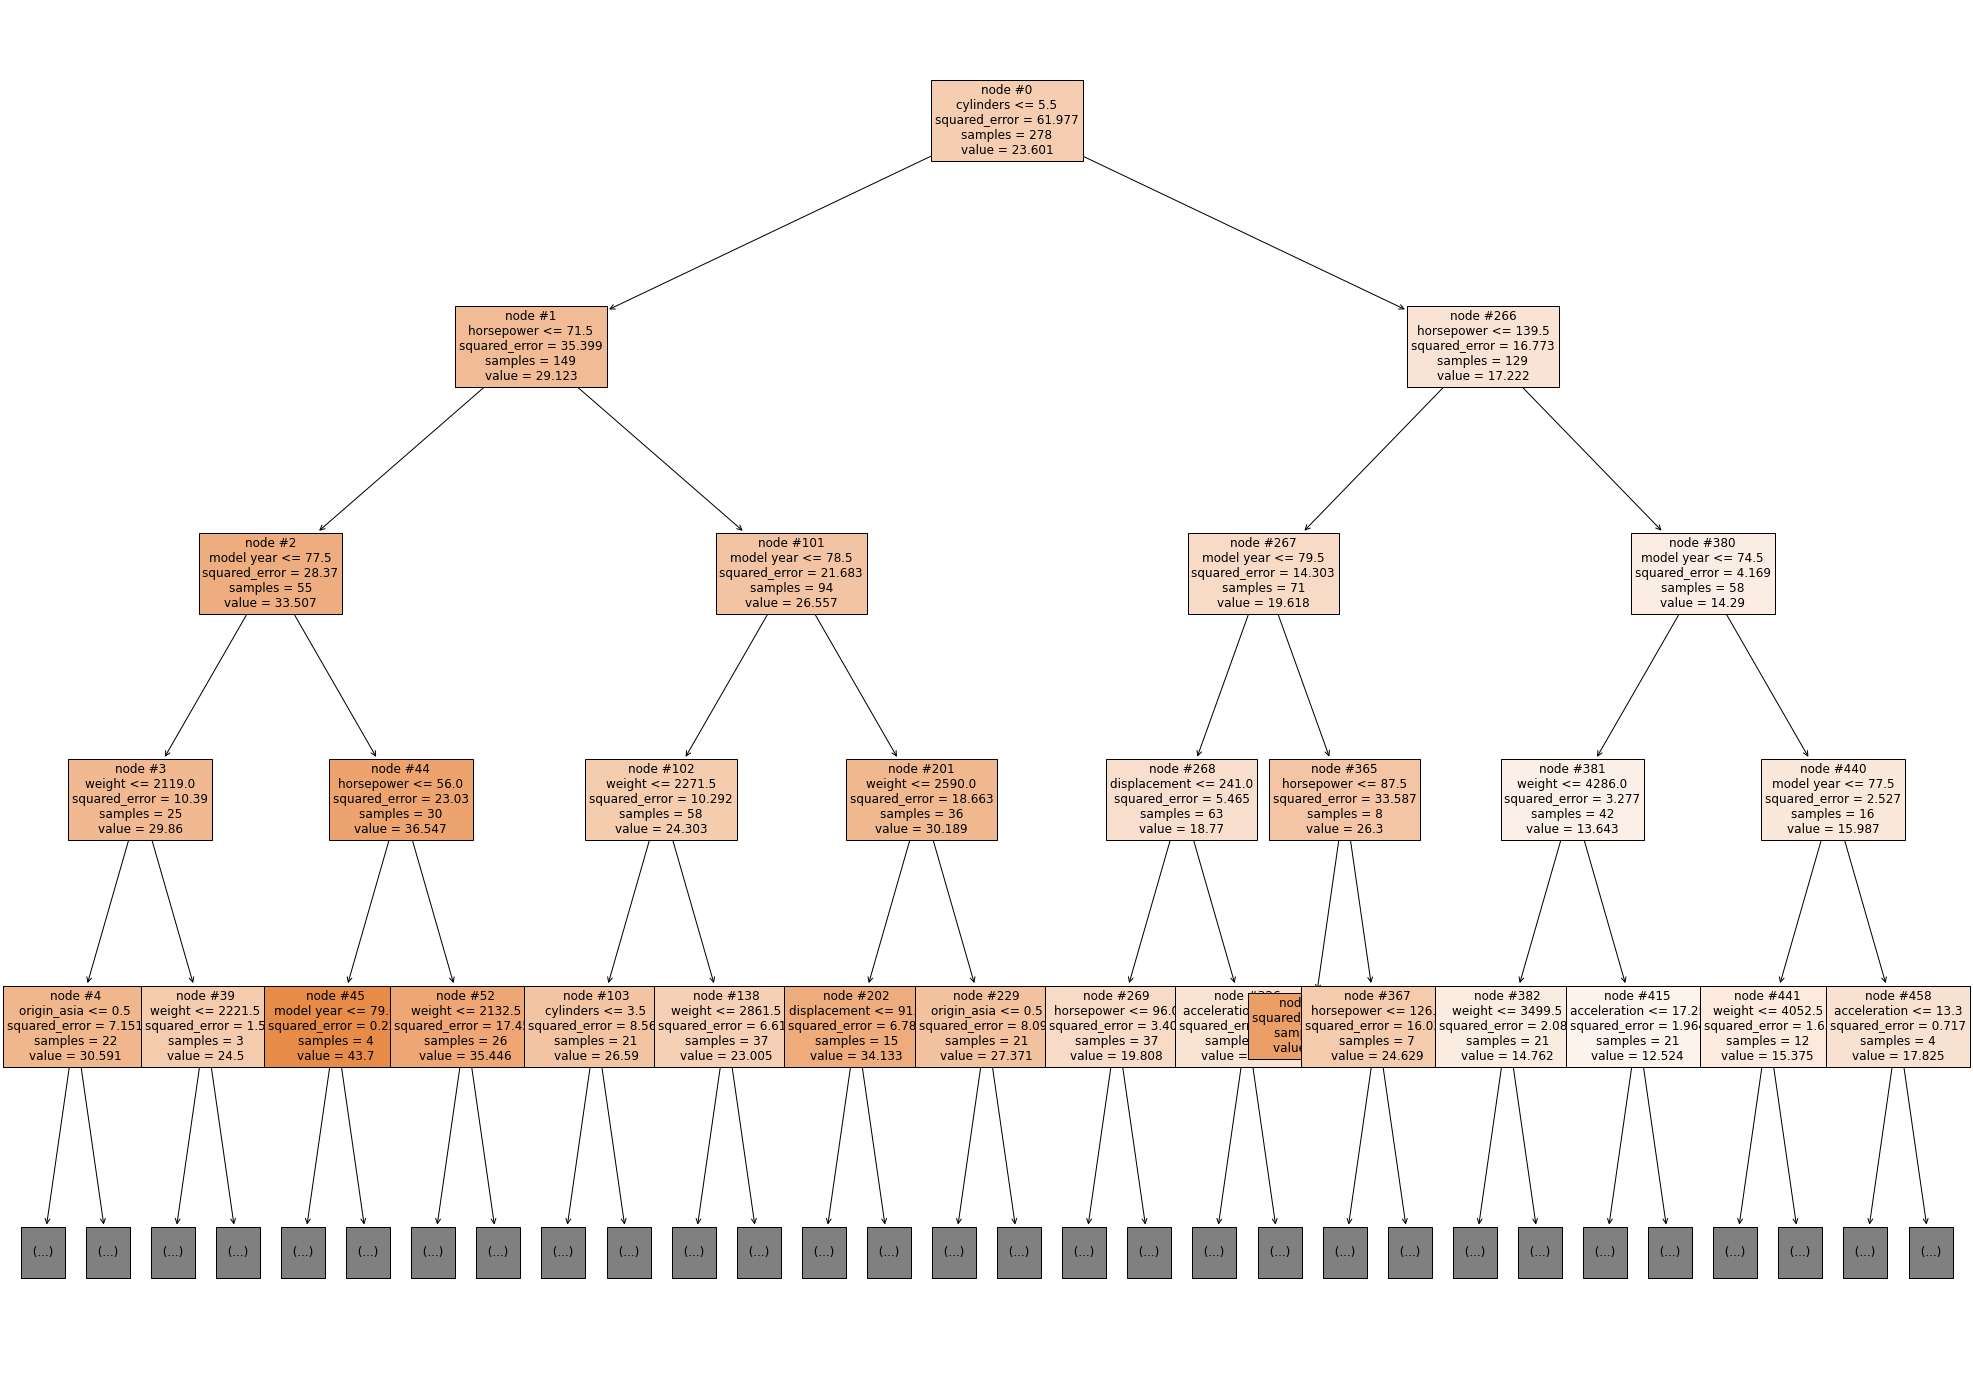

In [25]:
features = list(X1.columns)

plt.figure(figsize=(35,25))
plot_tree(dt, max_depth=4, feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

**Plot the feature importance for each variable**

/Users/stephanenjoki/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Importance'>

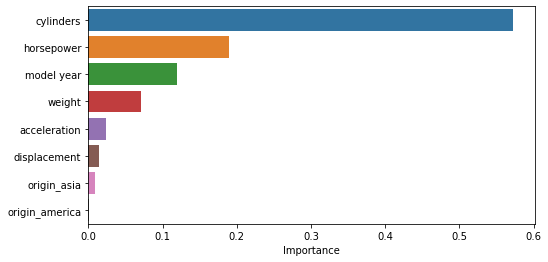

In [26]:
importances = dt.feature_importances_

columns=X1.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(importance_df.Importance,importance_df.index)

## Build a random forest! 

In [27]:
#importing random forest regressor using sklearn

from sklearn.ensemble import RandomForestRegressor

**What are the parameters for regression?**

- n_estimators: The number of trees in the forest.

- min_samples_split: The minimum number of samples required to split an internal node:

- max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- max_features{“auto”, “sqrt”, “log2”, 'None'}: The number of features to consider when looking for the best split.

If “auto”, then max_features=sqrt(n_features).

If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

If “log2”, then max_features=log2(n_features).

If None, then max_features=n_features.

In [28]:
#defining the Random forest regressor

rf = RandomForestRegressor(n_estimators = 200, max_depth = 4, min_samples_split = 2)

#Hyperparameters, we have randomly choosen them for now but we can tune these hyperparameters and get the best model. 

#fitting the model
rf.fit(X_train1,y_train1)

RandomForestRegressor(max_depth=4, n_estimators=200)

## Check the perfomance of the random forest model

In [29]:
# checking model performance on test dataset

rf.score(X_test1,y_test1)

0.8770024095097273

In [30]:
model_pref(rf, X_train1, X_test1,y_train1,y_test1)  

    Data      RMSE       MAE      MAPE
0  Train  2.127157  1.606070  7.042188
1   Test  2.681659  1.981508  8.585071


## Check the feature importance of each variable in the random forest

/Users/stephanenjoki/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Importance'>

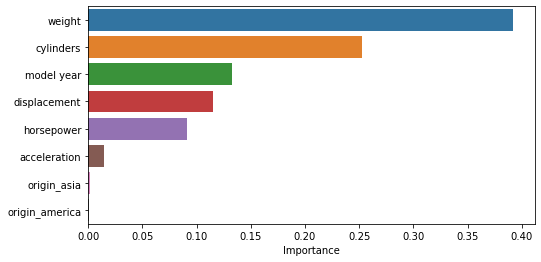

In [31]:
importances = rf.feature_importances_

columns=X1.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(importance_df.Importance,importance_df.index)

## Compare Linear regression, Decision tree and Random Forest

In [32]:
print("Linear Regression")
model_pref(model1, X_train_ols, X_test_ols,y_train,y_test)
print("Decision tree")
model_pref(dt, X_train1, X_test1,y_train1,y_test1)
print("Random Forest")
model_pref(rf, X_train1, X_test1,y_train1,y_test1)  

Linear Regression
    Data      RMSE       MAE       MAPE
0  Train  3.394323  2.653321  12.445607
1   Test  3.026711  2.354281  11.147284
Decision tree
    Data      RMSE       MAE       MAPE
0  Train  0.000000  0.000000   0.000000
1   Test  3.941129  2.561667  11.255189
Random Forest
    Data      RMSE       MAE      MAPE
0  Train  2.127157  1.606070  7.042188
1   Test  2.681659  1.981508  8.585071
